# Introduction
In this project, we're looking into the Covid19 dataset. This project aims to increase our overall understanding of which US states and territories have been 

answer some of the interesting underlying questions about the data using machine learning algorithms as well as providing guidance for future exploration of the data.

## Project Content
- Loading the libraries
- Introduction to the Covid-19 Datasets
- Exploratory Data Analysis

# Loading the Libraries
This project uses the following libraries: [sklearn](https://scikit-learn.org/stable/) and [scipy](https://www.scipy.org/) 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Introduction to the Covid-19 Datasets

### Four datasets are used in this notebook. The majority of the exploratory data analysis comes from the first dataset, which consists of 5,624 rows and 5 columns (date, state, fips, cases, and deaths). It covers data from January 21, 2020 through June 12, 2020. The states include all 50 states in the US, the District of Columbia, and four US territories. The cases and deaths refer to the number of confirmed cases of Covid-19 and the number of deaths from Covid-19, respectively, as of a specific date. This dataset is available in the data folder. The original CSV file is available in the data/nytimes folder.
### The other three datasets used in this notebook are available in the data folder as well. The pre-cleaned versions for the first two of these datasets are available in the folder data/RoughData. The pre-cleaned version of the third dataset was too large for the GitHub repository. They were used to create the correlation matrix at the bottom of the file. The first dataset, influenza_pneumonia_2018, includes statistics about the death rate and number of deaths from influenza/pneumonia. This data came from the Centers for Disease Control. We used the data from 2018 as the death rates and number of deaths for the 2019 and 2020 years have not been finalized yet. This dataset consisted of 50 rows and 3 columns. The second dataset came from Google and consists of their community mobility data. It contains data for February 15, 2020 through June 7, 2020. Google does note values increased and decreased mobility that was statistically insignificant were removed from the dataset. The third dataset came from the Kaiser Family Foundation. It is not used in the correlation matrix as it contains categorical features, but in future work, we may find that those features are statistically significant.
#### The cleaning of the last three datasets occurred in the notebook COVID_Hackathon_Data_Cleaning.

In [2]:
# Read the CSV files containing data about the number of cases and deaths in each state
states_df = pd.read_csv('data/nytimes/us-states.csv')

In [3]:
# Display the first and last five of the cases and deaths data as well as the number of rows and columns
states_df.head

<bound method NDFrame.head of             date          state  fips  cases  deaths
0     2020-01-21     Washington    53      1       0
1     2020-01-22     Washington    53      1       0
2     2020-01-23     Washington    53      1       0
3     2020-01-24       Illinois    17      1       0
4     2020-01-24     Washington    53      1       0
...          ...            ...   ...    ...     ...
5619  2020-06-12       Virginia    51  53211    1534
5620  2020-06-12     Washington    53  26576    1207
5621  2020-06-12  West Virginia    54   2249      88
5622  2020-06-12      Wisconsin    55  22345     692
5623  2020-06-12        Wyoming    56   1027      18

[5624 rows x 5 columns]>

# Exploratory Data Analysis

### To better understand Covid-19, it is crucial to see how the virus has developed and which states have been the most affected. For this reason, we begin our exploratory data analysis by examining the number of cases and deaths in each state. 

In [4]:
# Display the column names for the cases and deaths dataset
states_df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
# Display the types of each column
states_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [6]:
# First group by states
grouped = states_df.groupby('state')

### The following shows example data from the state of Washington. If you are interested in seeing example data from a different state, replace 'Washington' with the state of your choice.

In [7]:
state = 'Washington'
grouped.get_group(state)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0
...,...,...,...,...,...
5400,2020-06-08,Washington,53,25593,1168
5455,2020-06-09,Washington,53,25796,1181
5510,2020-06-10,Washington,53,25940,1183
5565,2020-06-11,Washington,53,26172,1198


### Although seeing example data can give us a snapshot of one particular location, we would like to see a more holistic picture. Let's do this by first looking at the five states with the highest number of cases and deaths.

In [8]:
# From each state, find the row with the highest number of cases and deaths
state_sum = grouped.max()

### Five States with the Highest Number of Cases

In [9]:
# Display the five states with highest number of cases
state_sum.nlargest(5, 'cases')

,date,fips,cases,deaths
state,,,,
New York,2020-06-12,36,386490,30511
New Jersey,2020-06-12,34,166164,12489
California,2020-06-12,6,147269,4986
Illinois,2020-06-12,17,132489,6469
Massachusetts,2020-06-12,25,105059,7538


### Five States with the Highest Number of Deaths

In [10]:
# Display the five states with the highest number of deaths
state_sum.nlargest(5, 'deaths')

,date,fips,cases,deaths
state,,,,
New York,2020-06-12,36,386490,30511
New Jersey,2020-06-12,34,166164,12489
Massachusetts,2020-06-12,25,105059,7538
Illinois,2020-06-12,17,132489,6469
Pennsylvania,2020-06-12,42,82578,6229


### Seeing the number of cases and the number of deaths per state provides some insight into the current pandemic, but we need more information to understand its severity. Specifically, we need to see how the numbers of deaths compares to the number of cases. For this reason, we have calculate the Covid-19 death rate for the five most affected states. The death rate is a simple calculation where the number of deaths is divided by the number of cases (as shown below).
### Connecticut has the highest death rate - 9.3% It is followed by Michigan (9.1%), the Virgin Islands* (8.3%), New York (7.9%), and Pennsylvania (7.5%).

*Note: This refers to the US territory.

In [11]:
# Calculate the newest death rate for each state
death_rate_df = state_sum['deaths']/state_sum['cases']
death_rate_df.nlargest(5)

state
Connecticut       0.093065
Michigan          0.090982
Virgin Islands    0.083333
New York          0.078944
Pennsylvania      0.075432
dtype: float64

### The following bar graph shows how many states, US territories (Puerto Rico, the US Virgin Islands, Guam, and the Northern Mariana Islands but excluding American Somoa), and the District of Columbia have had a certain range of cases. The majority of these areas have had fewer than 50,000 cases, but one state - New York - has had significantly more (386,490 confirmed cases).

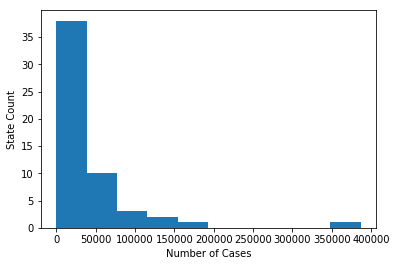

In [12]:
# plot histogram based on state total cases
%matplotlib inline

x = state_sum['cases']

#.get_level_values('cases')
plt.hist(x, density=False)  # `density=False` would make counts
plt.ylabel('State Count')
plt.xlabel('Number of Cases');

### The next bar graph shows similar information, but it shows the number of deaths rather than the number of cases.

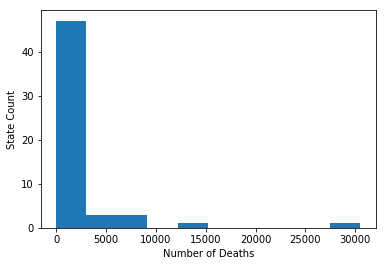

In [13]:
#plot histogram (50?) based on state total deaths
%matplotlib inline

x = state_sum['deaths']

#.get_level_values('cases')
plt.hist(x, density=False)  # `density=False` would make counts
plt.ylabel('State Count')
plt.xlabel('Number of Deaths');

### Now that we have some insight into the prevalence of Covid-19 across the United States, let's look at how the disease has developed over time.

In [14]:
# This state shows the number of cases and deaths in a particular state. 
# If you would like to see the number of cases and deaths in a particular state before you look at trends over time, replace 'Washington' with the state of your choice. 
state = 'Washington'
state_data = state_sum.loc[state]
state_data

date      2020-06-12
fips              53
cases          26576
deaths          1207
Name: Washington, dtype: object

In [15]:
#Function for plotting trends of cases and deaths

def plot_overall_trend(state_name, case_or_death):
    state_case_series = grouped.get_group(state_name)[case_or_death]
    time_duration = grouped.get_group(state_name)['date']

    time = pd.to_datetime(time_duration)
    #fig = plt.figure()
    fig, ax = plt.subplots()
    ax.plot(time, state_case_series)

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # use a more precise date string for the x axis locations in the
    # toolbar
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_title('Overall trend of number of '+ case_or_death +' in ' + state_name + ' State')
    plt.xlabel('Time', fontsize = 12)
    plt.ylabel('Number of ' + case_or_death, fontsize = 12)
    #fig.savefig('test.jpg')
    return

### Let's examine how the number of cases has developed over time in two states. We have chosen New York and Washington.
### At initial glance, it appears that Washington has had a sharper increase, but the numbers actually show that New York's confirmed cases grew from less than 50,000 in March to over 300,000 in May. The number of cases in Washington has also grown logarithmically, but as of June, it has not surpassed 30,000 cases.  

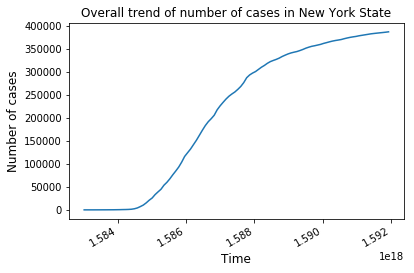

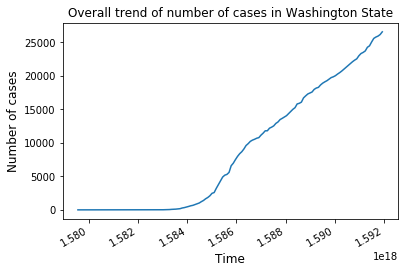

In [16]:
plot_overall_trend('New York', 'cases')
plot_overall_trend('Washington', 'cases')

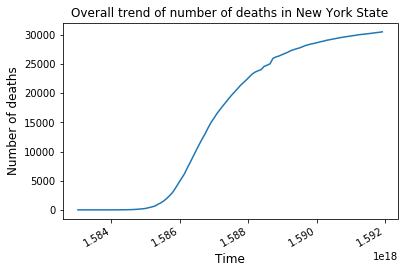

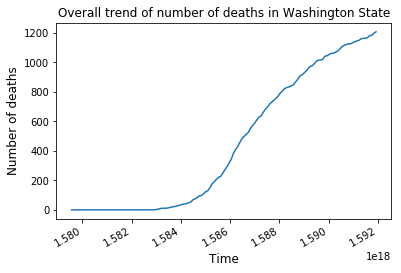

In [17]:
plot_overall_trend('New York', 'deaths')
plot_overall_trend('Washington', 'deaths')

### If you are interested comparing other states, replace 'New York' and 'Washington' in the following cell with the states of your choice. Define the parameter variable as either 'cases' or 'deaths', depending on which data you would like to see.

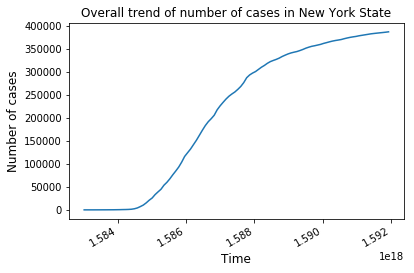

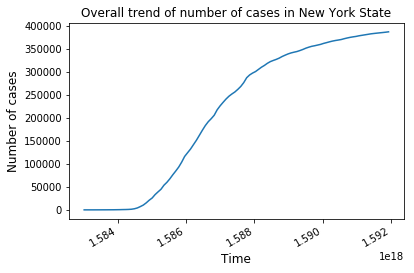

In [18]:
# Compare the number of cases over time
state1 = 'New York'
state2 = 'Washington'
parameter = 'cases'
plot_overall_trend(state1, parameter)
plot_overall_trend(state1, parameter)

### The following plots show daily trends for New York and Washington.

In [19]:
#Function for plotting daily new cases and deaths

def plot_daily_trend(state_name, case_or_death):
    state_case_series = grouped.get_group(state_name)[case_or_death]

    daily_increases = state_case_series.diff()

    time_duration = grouped.get_group(state_name)['date']

    time = pd.to_datetime(time_duration)
    #fig = plt.figure()
    fig, ax = plt.subplots()
    ax.plot(time, daily_increases)

    # rotate and align the tick labels so they look better
    fig.autofmt_xdate()

    # use a more precise date string for the x axis locations in the
    # toolbar
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.set_title('Daily trend of new '+ case_or_death +' in ' + state_name + ' State')
    plt.xlabel('Time', fontsize = 12)
    plt.ylabel('Number of new daily' + case_or_death, fontsize = 12)
    #fig.savefig('test.jpg')
    return



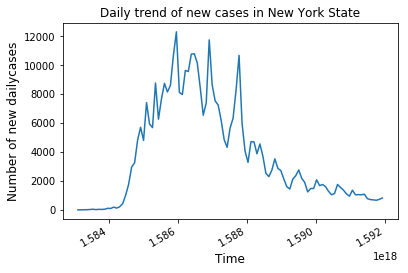

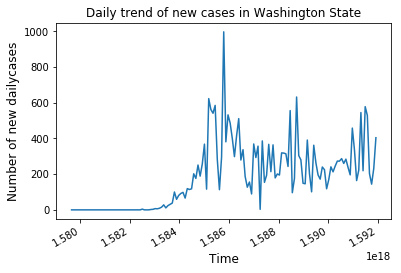

In [20]:
plot_daily_trend('New York', 'cases')
plot_daily_trend('Washington', 'cases')

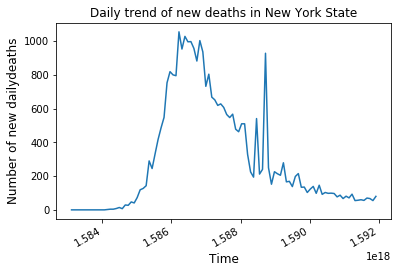

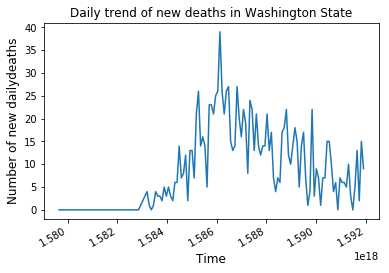

In [21]:
plot_daily_trend('New York', 'deaths')
plot_daily_trend('Washington', 'deaths')

In [22]:
#calculate the newest death rate for each state
death_rate_df = state_sum['deaths']/state_sum['cases']
death_rate_df.nlargest(5)

state
Connecticut       0.093065
Michigan          0.090982
Virgin Islands    0.083333
New York          0.078944
Pennsylvania      0.075432
dtype: float64

## Correlation: We are using 0.7 and -0.7 as the thresholds for high positive and negative correlation, respectively. 
## There is a high correlation between the number of influenza/pneumonia deaths and the number of tests performed. 
#### There is a high correlation between the positive_tests_range_min and positive_tests_range_max - this has no meaningful significance between these numbers came from a range string. 
#### There is also a high correlation between going to various locations outside of residential areas vs staying in residential areas. For example, if the rate of retail and recreation mobility increased, the rate of grocery and pharmacy mobility also increased. The correlation matrix does not show any statistical significance between the current day's number of cases and deaths and the current day's mobility. However, adjusting the data to show the increase or decrease in mobility anywhere from 4-14 days (4-5 days is the average incubation period for Covid-19) before the current day would likely shed more insight as it takes a while for individuals to become infected and get tested. Adjusting this data would be the next step in analyzing the correlation.

In [24]:
# Read influenza/pneumonia data and positive tests data
influenza_pneumonia_2018_df = pd.read_csv("data/influenza_pneumonia_2018.csv")
positive_tests_df = pd.read_csv("data/covid19_positive_tests.csv")
community_mobility_df = pd.read_csv("data/mobility_data.csv")
# convert date columns to datetime object
community_mobility_df.date = pd.to_datetime(community_mobility_df.date)
states_df.date = pd.to_datetime(states_df.date)

# Combine these data sets with the states_df data set
comparison_data1 = pd.merge(influenza_pneumonia_2018_df, positive_tests_df, on = "state")
comparison_data2 = pd.merge(states_df, community_mobility_df, on = ["state", "date"])
comparison_data = pd.merge(comparison_data1, comparison_data2, on = "state")

# Display the combined dataframe
comparison_data

,state,influenza_pneumonia_rate,influenza_pneumonia_deaths,number_tests_performed,positive_tests,positive_tests_range_min,positive_tests_range_max,date,fips,cases,deaths,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alabama,21.4,1268,346963,11-20%,0.11,0.20,2020-03-13,1,6,0,7.0,32.0,26.0,7.0,-2.0,0.0
1,Alabama,21.4,1268,346963,11-20%,0.11,0.20,2020-03-14,1,12,0,1.0,28.0,55.0,12.0,4.0,0.0
2,Alabama,21.4,1268,346963,11-20%,0.11,0.20,2020-03-15,1,23,0,-7.0,16.0,16.0,6.0,-4.0,2.0
3,Alabama,21.4,1268,346963,11-20%,0.11,0.20,2020-03-16,1,29,0,-2.0,24.0,22.0,2.0,-10.0,4.0
4,Alabama,21.4,1268,346963,11-20%,0.11,0.20,2020-03-17,1,39,0,-11.0,17.0,25.0,-1.0,-17.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,Wyoming,18.9,128,42135,0-5%,0.00,0.05,2020-06-03,56,915,17,5.0,17.0,132.0,18.0,-24.0,6.0
4807,Wyoming,18.9,128,42135,0-5%,0.00,0.05,2020-06-04,56,921,17,5.0,22.0,146.0,22.0,-24.0,5.0
4808,Wyoming,18.9,128,42135,0-5%,0.00,0.05,2020-06-05,56,933,17,-1.0,18.0,176.0,28.0,-24.0,5.0
4809,Wyoming,18.9,128,42135,0-5%,0.00,0.05,2020-06-06,56,939,17,-7.0,12.0,135.0,27.0,-10.0,3.0


In [25]:
corr = comparison_data.corr(method="pearson")
corr

,influenza_pneumonia_rate,influenza_pneumonia_deaths,number_tests_performed,positive_tests_range_min,positive_tests_range_max,fips,cases,deaths,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
influenza_pneumonia_rate,1.000000,0.051747,-0.053731,-0.092605,-0.036212,0.007540,0.033142,0.045417,0.065213,0.105631,-0.057938,0.192188,0.062796,-0.053127
influenza_pneumonia_deaths,0.051747,1.000000,0.874434,0.307583,0.250737,-0.125784,0.446861,0.374970,-0.125777,-0.118384,-0.227302,-0.173673,-0.036550,0.087019
number_tests_performed,-0.053731,0.874434,1.000000,0.327729,0.293402,-0.110645,0.594140,0.534164,-0.170820,-0.156630,-0.235990,-0.259567,-0.069847,0.129127
positive_tests_range_min,-0.092605,0.307583,0.327729,1.000000,0.963545,-0.216558,0.298576,0.269891,-0.109496,-0.105935,-0.002629,-0.167521,-0.076183,0.134986
positive_tests_range_max,-0.036212,0.250737,0.293402,0.963545,1.000000,-0.189594,0.317524,0.296624,-0.126393,-0.121255,-0.012956,-0.183705,-0.092621,0.148700
fips,0.007540,-0.125784,-0.110645,-0.216558,-0.189594,1.000000,-0.007865,0.002991,0.029349,0.041170,0.106968,0.096678,0.018545,-0.027580
cases,0.033142,0.446861,0.594140,0.298576,0.317524,-0.007865,1.000000,0.979222,-0.235939,-0.161098,0.001084,-0.304519,-0.208759,0.208585
deaths,0.045417,0.374970,0.534164,0.269891,0.296624,0.002991,0.979222,1.000000,-0.210631,-0.138043,0.014454,-0.266034,-0.175303,0.177395
retail_and_recreation_percent_change_from_baseline,0.065213,-0.125777,-0.170820,-0.109496,-0.126393,0.029349,-0.235939,-0.210631,1.000000,0.820104,0.404193,0.849991,0.741095,-0.771390
grocery_and_pharmacy_percent_change_from_baseline,0.105631,-0.118384,-0.156630,-0.105935,-0.121255,0.041170,-0.161098,-0.138043,0.820104,1.000000,0.429153,0.787379,0.645249,-0.659348
